In [1]:
model_path = '../output/ablation-cifar10-models2/relog-quadratic-max_fit_l2-maxout_4-mse.pkl'

In [2]:
import sys
sys.path.append('..')

In [4]:
%matplotlib inline
from scipy.special import softmax
import seaborn as sns
from matplotlib import pyplot as plt
import torch
import torchvision
import numpy as np
from train import cifar_stats

In [5]:
model = torch.load(model_path, map_location=torch.device('cpu'))

In [21]:
transform_test = torchvision.transforms.Compose([
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize(*cifar_stats)
        ])
test_dataset = torchvision.datasets.CIFAR10(
            root='../cifar10',
            train=False,
            transform=transform_test, 
            download=False,
        )
test_loader = torch.utils.data.DataLoader(dataset, batch_size=100, shuffle=False)

In [22]:
x, y = next(iter(test_loader))

In [23]:
def compute_max_probs(x):
    preds, _ = model(x)
    preds_softmax = softmax(preds.detach().numpy(), axis=1)
    max_probs = np.max(preds_softmax, axis=1)
    return max_probs

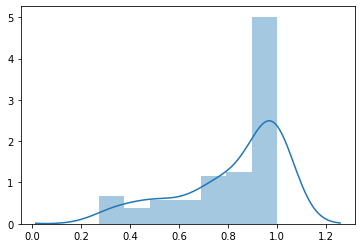

In [24]:
max_probs = compute_max_probs(x)
sns.distplot(max_probs)

In [25]:
max_probs.mean()

0.81715065

In [26]:
max_probs.std()

0.21070795

# How does it fare on training set?

In [15]:
train_dataset = torchvision.datasets.CIFAR10(
            root='../cifar10',
            train=True,
            transform=transform_test, 
            download=False,
        )
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=False)

In [16]:
train_x, train_y = next(iter(train_loader))

In [17]:
max_probs = compute_max_probs(train_x)

In [18]:
max_probs.mean()

0.79595673

In [19]:
max_probs.std()

0.22055289